In [1]:
import numpy as np
import torch
from cebmf_torch.torch_ebnm_point_laplace import ebnm_point_laplace

In [2]:
x = torch.tensor([0.0, 1.0, -0.5])
s = torch.tensor([1.0, 0.2, 1.0])
res = ebnm_point_laplace(x, s )
expected_log_lik = -4.161880337595547
expected_post_mean = np.array([0.0, 0.9326135, -0.15496329])



In [3]:
res.log_lik# should be close to , expected_log_lik

-4.1618804931640625

In [4]:
res.post_mean

tensor([ 0.0000,  0.9326, -0.1550])

In [ ]:
import torch
import math
from cebmf_torch.torch_ebnm_point_exp import ebnm_point_exp 
from cebmf_torch.torch_ebnm_point_laplace import  ebnm_point_laplace
# If you saved the previous implementation in torch_only_point_exponential.py:
# from torch_only_point_exponential import ebnm_point_exp_solver
 
dtype = torch.float64
device = "cpu"

# Generate data (same structure as your NumPy snippet)
true_val1 = 3*torch.randn(100000, dtype=dtype, device=device)          # ~ N(0,1)
true_val0 = torch.zeros(200000, dtype=dtype, device=device)

observations_mu_1 = true_val1 + torch.randn(100000, dtype=dtype, device=device)  # add N(0,1) noise
observations_mu_0 = true_val0 + torch.randn(200000, dtype=dtype, device=device)  # add N(0,1) noise

betahat = 0*torch.cat([observations_mu_1, observations_mu_0], dim=0)            # shape (300,)
sebetahat = torch.ones_like(betahat)                                          # all s = 1

# Fit point-exponential EBNM
res = ebnm_point_laplace(
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

res0 = ebnm_point_exp (
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

ImportError: cannot import name 'ebnm_point_exp_solver' from 'cebmf_torch.torch_ebnm_point_exp' (C:\Document\Serieux\Travail\python_work\package\cebmf_torch\src\cebmf_torch\torch_ebnm_point_exp.py)

In [ ]:
import matplotlib.pyplot as plt
import torch

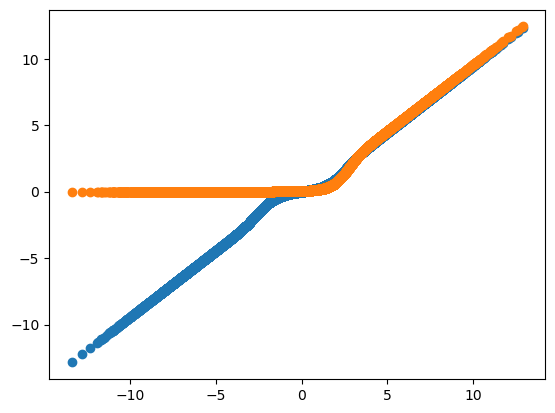

In [ ]:
plt.scatter(betahat,res.post_mean)
plt.scatter(betahat,res0.post_mean)